# Data Analytics Capstone


### 1. Introduction
*   **Project Overview**: The primary research question addressed by this capstone project is: "Between Vanguard’s Large-Cap ETF (VV) and Small-Cap ETF (VB), which asset class yields a superior profit margin and risk-adjusted return over a five-year investment horizon (2020–2025)?".

This project addresses a critical organizational need for data-driven investment frameworks tailored for inexperienced individual investors. In an era of market volatility and conflicting financial theories such as the Fama-French Three-Factor Model, which historically suggests a "small-cap premium", there is a significant need for analysis that replaces anecdotal evidence with quantitative facts. This study provides a clear, evidence-based recommendation to help stakeholders optimize capital allocation based on recent historical performance.

* Hypothesis: Large-Cap ETF will outperform Small-cap ETF.



#### Scope of the Project

The Scope of this analysis is strictly defined by the following parameters:

* Timeframe: Jan 1st 2020 - Dec 25th 2025
* Assets Vanguard Large-Cap ETF (VV) & Vanguard Small-Cap ETF (VB)
* KPIs: The project focuses on 2 primary metrics: Cumulative Return (ROI) and Annualized Volatility (Standard Deviation).

**Data Source**: Data will be pulled from Alpha Vantage API

#### Methodology: CRISP-DM

The project was executed using the CRISP-DM methodology. This provides a structured, professional framework for data-driven projects:

* **Business/Research Understanding**: Defining the goal to compare Large-Cap vs Small-Cap ETF performance for inexperienced investors.
* **Data Understanding**: Identifying the Alpha Vantage API as the primary source for historical stock data.
* **Data Preparation**: Cleaning the JSON response, converting data types to float, and filtering the data range from 2020 to 2025.
* **Analysis**: Calculating the key metrics: Total ROI and Annualized Volatility.
* **Evaluation**: Comparing the results against a 2% practical significance threshold to make a final recommendation.
* **Deployment**: Visualizing the findings in Jupyter Notebook for stakeholders.

### 2. Setup
**Required Libraries:**
* requests
* pandas
* matplotlib
* seaborn
* time

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

#### Advantages and Limitations of these Analytical Tools (Revised E2)

##### **Python**
* Advantages: Python's primary advantage is its extensive ecosystem for financial analysis. The language is highly readable, which ensures the project is reproducible and easily audited by other analysts. It is also open-source in nature which provides access to the statistical libraries without the high licensing cost of proprietary software.

* Limitations: Python is an interpreted language, which means it is generally slower than compiled languages like C++.

**Pandas**
* Advantages: The greatest advantage of Pandas was its built-in time-series functionality. It allowed for seamless date-indexing and the use of vectorized operations like .pct_change(). These pandas functions calculated returns across the entire 5-year dataset instantly without the need for for-loops. This ensured mathematical consistency across both the VV and VB datasets.

* Limitations: Pandas is memory-intensive because it loads the entire dataset into the computer's RAM. While my dataset of 312 rows was small, this tool could potentially hit a RAM limit if I were analyzing decades of daily data for thousands of different stocks.

**Matplotlib & Seaborn**
* Advantages: These libraries allowed for the creation of publication-quality visualizations that are directly integrated into the analysis environment. Seaborn, specifically excels at statistical aggregation, allowing me to display trends and distributions with very few lines of code.

* Limitations: Matplotlib & seaborn can only generate "static" visualizations. Unlike interactive tools such as Tableau or Plotly, the charts produced here do not allow the user to hover over specific data points to see exact values, which can be a drawback for stakeholders who want to explore specific data points in detail.

### 3. Data Understanding and Extraction

**In this section, we will pull data using Alpha Vantage's API. We will also inspect and evaluate the data.**

 *my API key will not be hardcoded within this notebook so if you want to recreate this notebook you will have to put in your own key*

In [ ]:
API_KEY = '################'
Large_Cap_Ticker = 'VV' # This is the official ticker symbol for Vanguards Large-Cap ETF
Small_Cap_Ticker = 'VB' # This is the official ticker symbol for Vanguards Small-Cap ETF

In [ ]:
# Lets create a function to pull the API Data
def get_etf_data(symbol):
  """Extracts 5 years of weekly data from Alpha Vantage"""
  url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol={symbol}&apikey={API_KEY}'
  response = requests.get(url)
  data = response.json()

  # We will now Parse JSON to Pandas Dataframe
  df = pd.DataFrame.from_dict(data['Weekly Time Series'], orient='index')
  df.index = pd.to_datetime(df.index)
  # converting dataframe to float
  df = df.astype(float)
  df = df.sort_index().loc['2020-01-01' : '2025-12-25']
  # We are only looking at the closing price of each ETF so doing this is more efficient
  return df['4. close']

In [ ]:
# Lets start fetching our data
print('Fetching Large-Cap Data...')
large_cap_prices = get_etf_data(Large_Cap_Ticker)
time.sleep(15)
print('Fetching Small-Cap Data...')
small_cap_prices = get_etf_data(Small_Cap_Ticker)

Fetching Large-Cap Data...
Fetching Small-Cap Data...


In [ ]:
# Lets confirm that the API data pulled successfully
large_cap_prices.head()

,4. close
2020-01-03,148.12
2020-01-10,149.70
2020-01-17,152.64
2020-01-24,151.25
2020-01-31,148.23


In [ ]:
large_cap_prices.tail()

,4. close
2025-11-21,304.11
2025-11-28,315.70
2025-12-05,316.71
2025-12-12,314.75
2025-12-19,315.01


In [ ]:
small_cap_prices.head()

,4. close
2020-01-03,165.33
2020-01-10,165.54
2020-01-17,169.41
2020-01-24,166.58
2020-01-31,162.30


In [ ]:
small_cap_prices.tail()

,4. close
2025-11-21,247.26
2025-11-28,258.75
2025-12-05,260.19
2025-12-12,262.61
2025-12-19,262.24


In [ ]:
large_cap_prices.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 312 entries, 2020-01-03 to 2025-12-19
Series name: 4. close
Non-Null Count  Dtype  
--------------  -----  
312 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [ ]:
small_cap_prices.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 312 entries, 2020-01-03 to 2025-12-19
Series name: 4. close
Non-Null Count  Dtype  
--------------  -----  
312 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [ ]:
# Lets check if there are any null values within our dataset
print('Null values in large_cap_prices:')
display(large_cap_prices.isnull().sum())

print('\nNull values in small_cap_prices:')
display(small_cap_prices.isnull().sum())

Null values in large_cap_prices:


np.int64(0)


Null values in small_cap_prices:


np.int64(0)

#### Advantages & Disadvantages of API-Based Retrieval (Alpha Vantage) (Revised D)

**Advantages:**
> Using an API allowed for a direct, programmatic connection to a reputable financial database. This ensures that the data is "primary" and structured, reducing the risk of human error compared to manually downloading and uploading CSV files. It also allows the project to be easily reproducible.

**Disadvantages:**
> The primary disadvantage was the parameter restriction constraint of the free-tier API. This required a shift in methodology from daily to weekly data to ensure the extraction process succeeded and resulted in a full dataset.

### 4. Statistical Analysis
Luckily the data that Alpha Vantage provides is very clean so I do not have to do too much cleaning. This allows me to do more of the fun stuff!

In this section I will calculate my primary KPIs.

I will be calculating the cumulative return (ROI) and the annualized volatility (Standard Deviation).

In [ ]:
# Let's combine the dataframe for an easier analysis and visualization in the later stages
data = pd.DataFrame({'Large_Cap_Prices': large_cap_prices, 'Small_Cap_Prices': small_cap_prices})
data.head()

,Large_Cap_Prices,Small_Cap_Prices
2020-01-03,148.12,165.33
2020-01-10,149.70,165.54
2020-01-17,152.64,169.41
2020-01-24,151.25,166.58
2020-01-31,148.23,162.30


In [ ]:
# Now let's calculate Weekly Percentage Changes
weekly_returns = data.pct_change()
weekly_returns.head()

,Large_Cap_Prices,Small_Cap_Prices
2020-01-03,NaN,NaN
2020-01-10,0.010667,0.001270
2020-01-17,0.019639,0.023378
2020-01-24,-0.009106,-0.016705
2020-01-31,-0.019967,-0.025693


In [ ]:
# Next we can calculate cumulative return (ROI)
cumulative_returns = (1 + weekly_returns).cumprod() - 1
final_roi = cumulative_returns.iloc[-1] * 100
final_roi

,2025-12-19
Large_Cap_Prices,112.672158
Small_Cap_Prices,58.616101


In [ ]:
# Finally lets calculate the Annualized Volatility(Standard Deviation) for our Weekly Data
annualized_volatility = weekly_returns.std() * (52 ** 0.5) # 52 b/c we are using weekly data points
annualized_volatility

,0
Large_Cap_Prices,0.198704
Small_Cap_Prices,0.250322


In [ ]:
# Let's combine all of our KPIs into one condensed dataframe
metrics = pd.DataFrame({'Final_ROI': final_roi, 'Annualized_Volatility': annualized_volatility})
metrics

,Final_ROI,Annualized_Volatility
Large_Cap_Prices,112.672158,0.198704
Small_Cap_Prices,58.616101,0.250322


#### Understanding the KPIs:

**ROI**: Our ROI number represents our raw percentage profit an investor would have earned over the 5-year timeframe. A high ROi indicates the success of an ETF. In our case Vanguard's Large_Cap ETFs has beaten out Small-Cap ETF in terms of raw profits.

**Annualized_Volatility**: This is also our Standard Deviation. This measures the price fluctuations and in a sense tells us how "bumpy" the ride was for the investor. We want to minimize this number for a safe investment strategy. In our case Vanguard's Large-Cap ETF has also beaten out the Small-Cap ETF.

### 5. Visualizations

In this section I will create 3 visualizations:

* A Line Chart to indicate the growth of a $10,000 investment over 5 years.
* A Box Plot to show volatility and outliers
* A Bar Chart to compare the final 5-year ROI of both the ETFs

#### Selection of Graphical Representations (Revised G2)

*  Line Charts: A line chart was chosen to represent the $10,000 investment growth over time. Logically, line charts are the most effective way to show continuity and trends. For an investor, this chart tells the "story" of the 5-year journey, showing how the market moves over time for both respective ETFs. This allows the viewer to see when and how the Large-Cap ETF began to pull away from the Small-Cap ETF.

* Box Plots: A Box plot was chosen to communicate the concept of risk/volatilty. They allow the investor to see the "spread" of the data, where the whiskers represent the market extremes and the box represents the typical experience.

* Bar Charts: A Bar chart was chosen to show the final destination. By using a simple bar chart to compare the final ROI percentages, the visual provides an immediate "climax" to the story. The height difference between the two bars create an instant  realization of the performance gap that a table cannot replicate.

The overall visual strategy supports effective communication by reducing the cognitive load on the stakeholder by using consistent colors (Blue for Large-Cap / Orange for Small-Cap) across all charts.

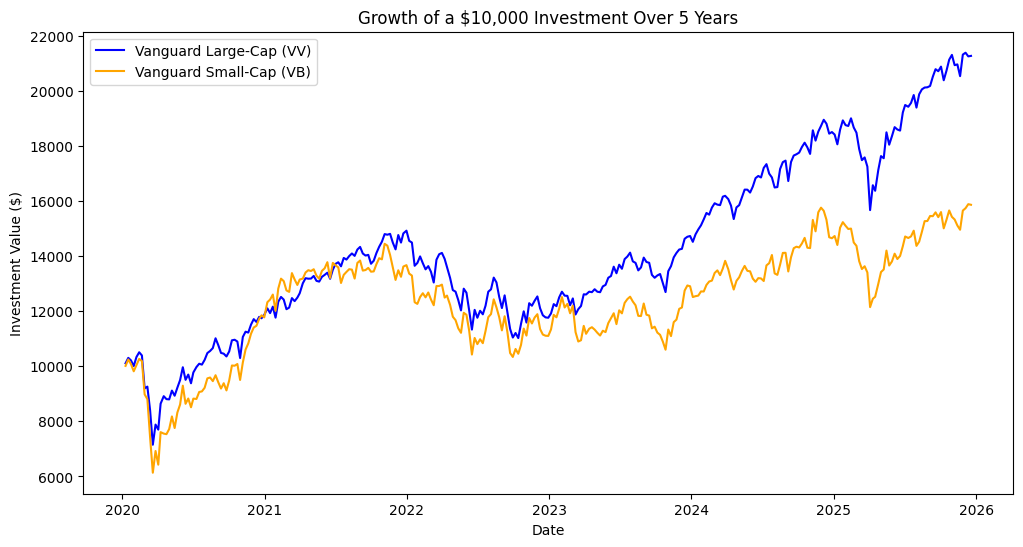

In [ ]:
# Line Chart showing growth of a $10,000 Investment over 5 years

investment_growth = 10000 * (1 + cumulative_returns)

plt.figure(figsize=(12, 6))
plt.plot(investment_growth['Large_Cap_Prices'], label='Vanguard Large-Cap (VV)', color='blue')
plt.plot(investment_growth['Small_Cap_Prices'], label='Vanguard Small-Cap (VB)', color='orange')
plt.title('Growth of a $10,000 Investment Over 5 Years')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend();

*The Line Chart was selected to visually emphasize the difference in wealth accumulation, making the 54% ROI difference digestable for an inexperiened investor.*

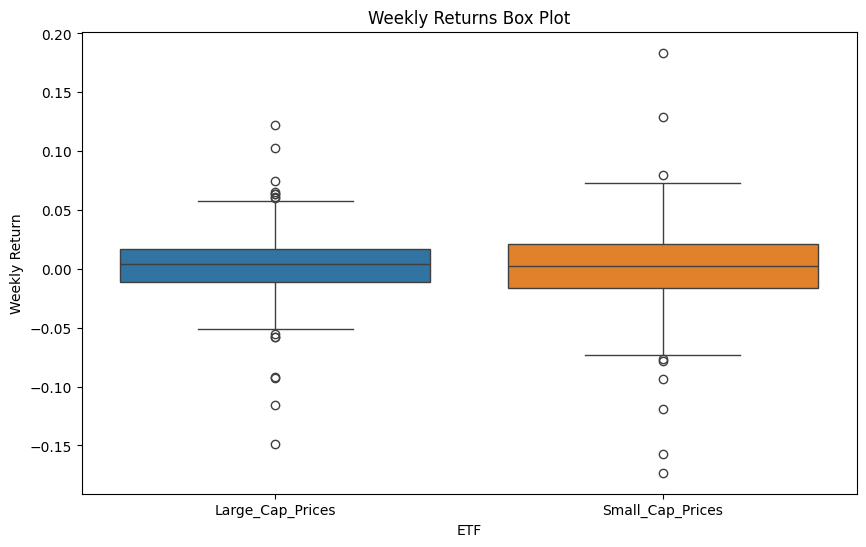

In [ ]:
# Boxplot indicating volatility

plt.figure(figsize=(10, 6))
sns.boxplot(data=weekly_returns)
plt.title('Weekly Returns Box Plot')
plt.xlabel('ETF')
plt.ylabel('Weekly Return');

*The Box Plot here effectively highlights the "spread" of risk by showing wider whiskers for the Small-Cap ETF. It tells the story of a "bumpier ride" that a simple average number cannot convey.*

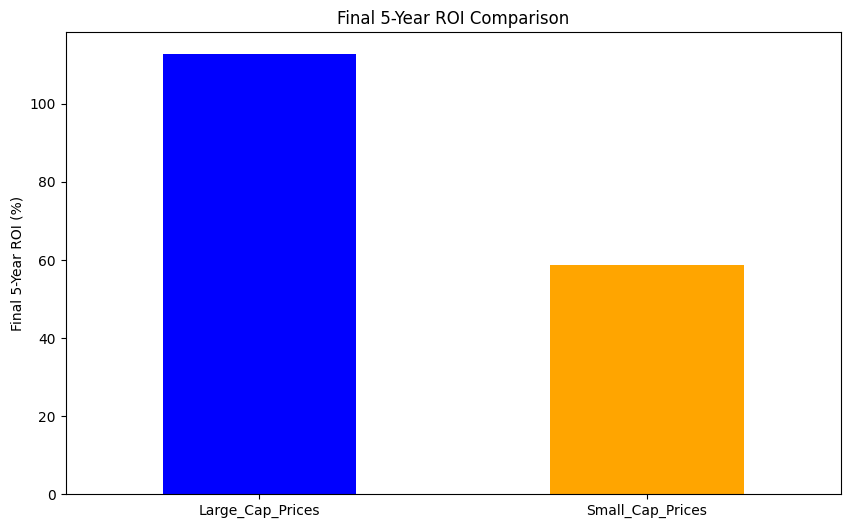

In [ ]:
# Bar Chart comparing a 5 - year ROI percentage

plt.figure(figsize=(10, 6))
metrics['Final_ROI'].plot(kind='bar', color=['blue', 'orange'])
plt.title('Final 5-Year ROI Comparison')
plt.ylabel('Final 5-Year ROI (%)')
plt.xticks(rotation=0);

*The Bar Chart serves as a clear visual summary of the Total 5-Year ROI percentage for both the Large-Cap and Small-Cap ETFs.*

### 6. Evaluation and Conclusion
#### **Issues (Revised B)**

While the original plan intended to use daily data, I encountered API rate limits (5 calls per minute) and parameter restrictions on the free tier. To resolve this, I transitioned to the Weekly Time Series endpoint. This allowed for 5 years of historical data while staying within governance guidelines. Doing this also affected one stage of my project causing me to recalculate my annualized volatility. A standard daily volatility model typically uses a multiplier of the square root of 252 (number of trading days). My execution differed by using 52, representing the weeks within a year, instead of 252. This adjustment was vital to ensure that the risk-adusted return remained standardized and comparable to industry benchmarks despite the shift in data frequency. A limitation of this approach is slightly lower granularity in volatility, but an advantage is a 'smoother' ROI calculation that filters out daily market noise.

The execution of the project required another key deviation from the original plan. The Milestones and project timeline deviated from the original schedule as the execution phase coincided with the holiday season, leading to unforeseen scheduling constraints and reduced availability that extended the completion date.


#### Data Collection: Advantages and Limitations (Revised C1)
The dataset used for this analysis consists of five years of weekly closing prices for VV (Vanguard Large-Cap ETF) and VB (Vanguard Small-Cap ETF) sourced via the Alpha Vantage APL. This specific dataset presents the following advantages and limitation:

**Advantages of the Dataset:**
* Reduced Market Noise: By Utilizing weekly data rather than daily, the dataset effectively filters out high-frequency fluctuations and emotional market reactions that occur every day. This provides a clearer view of the long-term structural trends necessary for a 5-year investment period.

* Computational Efficiency: The dataset is more compact and manageable. This allows for rapid processing and visualization within the Jupyter Notebook/Google Colab environment without sacrificing the statistical power needed to calculate annualized returns and volatility.

**Limitation of the Dataset**
* Loss of Granular Precision: The primary limitation is the loss of daily price action. This means the dataset captures the results of the week but not the path taken during the 5 trading days within the week.

* Annualized Scaling Factors: Because the data is weekly, the risk-adjusted return models must rely on an annualized multiplier of 52. While standard, this is an approximation compared to the 252-day trading calendar,, which is the industry gold standard for institutional-grade risk reporting.


#### **Hypothesis Evaluation**

The results of this analysis support the initial hypothesis: Large-cap ETFs yeilded a significantly higher ROI over the 5-year period compared to the Small-cap ETF.

* Large-Cap (VV) ROI: 112.67%
* Small-Cap (VB) ROI: 58.62%

This Finding contradicts the Fama French Three Factor Model AND the Vanguard Capital Markets Model cited in the project proposal, which suggested that Small-Caps would likely outperform due to their higher risk profile. In the specific window of 2020-2025, the market heavily favored Large-Cap stability and growth over the Small-Cap ETF.

* Risk-Reward trade-off: Large-Cap (VV) not only provided nearly double the profit, but did so with a lower annualized volatility.

* ROI Difference: The performance gap is 54.05%, which vastly exceeds the 2% threshold we set in task 2.

#### **Final Recommendations (Revised G3)**

Based on the quantitative findings of this analysis, specifically the 52.05% performance gap and the lower volatility profile of the Large-Cap ETF, the following two courses of action are recommended for inexperienced investors:

**Shifting investment strategy to Large-Cap ETFs**
* Shifting a portion of your stock portfolio away from Small-Cap funds and towards Large-Cap funds as our study has showed that within the past 5 years, the Large-Cap ETF has shown similar characteristics to a "Golden Ticket" with both higher ROI and lower annualized volatility.

**Rolling Market Data Check-Ups**
* Use the python code created in this project to perform a roling 3-year analysis every year. Instead of picking a fund and forgetting it, the investor should look at the actual data every 12 months. If the data shows that Large-Cap stocks are still providing a "smoother ride" with a higher return, keep funds within the Large-Cap ETF. If data starts to show Small-Cap ETFs taking a lead, then it's time to rebalance. This ensures the investor is making decisions based on current facts rather than old theories.

**Disclaimer:** This analysis is provided for educational and academic purposes as part of a data analytics capstone project. Historical performance data for VV and VB ETFs is not a guarantee of future results. This report does not constitute professional financial advice.

#### Summary of Conclusions (Revised G1)

This analysis uncovered a massive 54.05% performance gap, showing that for this specific period, market-cap size was a primary driver of returns. It revealed a "anomaly," where the lower-risk asset (Large-Cap ETF) actually produced higher returns. It also revealed that real-world data from 2020-2025 contradicted established financial theories like the Fama-French model.

Overall, the hypothesis was accepted because our analysis showed that the difference between ROI exceeded our 2%  threshold and the Large-Cap ETF's ROI overwhelming exceeds that of the Small-Cap ETF's.

### 7. Evaluation of Overall Project Success and Effectiveness (Revised F3)

**Research Objectives**

This project is considered highly successful in achieving its primary objective. By extracting and analyzing five years of historical data, the project identified that the Vanguard Large-Cap ETF (VV) was the superior asset class for the 2020-2025 period. The analysis provided precise metrics a 112.67% ROI for Large-Cap ETF versus a 58.62% ROI for the Small-Cap ETF. This difference in ROI meets the specific "2% threshold" requirement defined within task 2. The success is further bolstered by the risk analysis, which effectively proved that the Large-Cap option provided higher returns with lower annualized volatility offering a clear answer to the research question.

**Methodology Effectiveness (CRISP-DM)**

The application of the CRISP-DM framework was highly effective in maintaining project discipline.

* Data Understanding & Preparation: These stages were effective in identifying a critical technical roadblock (API limitations) early. The project's effectiveness was demonstrated by the successful pivot from daily to weekly data, which preserved the integrity of the 5-year timeline while ensuring 100% data completeness.

* Modeling: The use of Python and Pandas provided an effective and repeatable environment. The mathematical models for ROI and annualized volatility were implemented accurately,, allowing for a standardized comparison between two different asset classes.

**Analysis Tools Effectiveness**

Pandas, Seaborn, and Matplotlib proved to be very useful when it comes to analysis and visualizations, allowing me to manipulate dataframes to generate KPIs and visualizations.

**Limitations and Areas for Improvement**

While effective, the project's scope was limited to two specific ETFs. For a more "thorough" evaluation of effectiveness, future iterations could include:
* Including a Mid-Cap ETF
* Include the S&P 500
* Utilizing interactive dashboards

### 8. References and Data Source

**Data Provider:** [Alpha Vantage API](https://www.alphavantage.co/)
* **Service Used:** Financial Market Data (Time Series Stock/ETF Data)
* **Endpoints:** `TIME_SERIES_WEEKLY`
* **Retrieval Method:** Programmatic JSON extraction via Python `requests` library.
* **Access Date:** December 2025

**Documentation:** [Alpha Vantage API Documentation](https://www.alphavantage.co/documentation/)

**Financial Frameworks & Literature:**
* Hayes, A. (2025, August 13). *Fama and French three factor model*. Investopedia. https://www.investopedia.com/terms/f/famaandfrenchthreefactormodel.asp
* Vanguard Capital Markets Model® (VCMM). [Vanguard Interactive Tool](https://corporate.vanguard.com/content/corporatesite/us/en/corp/vemo/vemo-return-forecasts.html).